In [45]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

We import the handwritten digits dataset from keras library which convinietly gives train and test data seperateley

In [46]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


In [47]:
len(x_train)

60000

In [48]:
len(x_test)

10000

In [49]:
x_train[0].shape #images resolution

(28, 28)

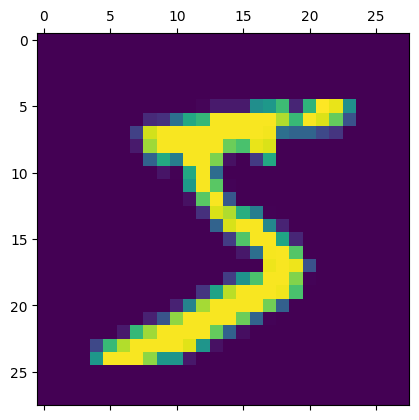

In [50]:
plt.matshow(x_train[0])

In [51]:
y_train #numbers from 0 to 9

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Lets convert 2d array into 1d array

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
# The accuracy without scaling is 0.8879
# it is supposed to increase after scaling, lets try doingit
x_train = x_train/255
x_test = x_test/255

# it increased to 0.9265

In [54]:
x_train_flattend = x_train.reshape(len(x_train),28*28) 
# after reshaping we want first dimension to be the same and second dimension to be 784
x_test_flattend = x_test.reshape(len(x_test),28*28) 

In [55]:
x_train_flattend.shape

(60000, 784)

Lets create a simple neural network without hidden layers

In [56]:
model = keras.Sequential(
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
) 

* sequential means I have a stack of layers in my neural network
* dense means all neurons are connected between the two adjecent layers  
* the first parameter is output shape which is 10 and the second is input shape

* optimizer allows you to train effeciently
* loss fuction can also be mean square error or MSC, but here other is used. The SCC is used mostly in one_hot_encoded models
* we can find differen types of losses on the tensorflow website https://www.tensorflow.org/api_docs/python/tf/keras/losses
* Metrics- When the neural netwoek is compiling the goal should be to improve accuracy.

In [58]:
model.evaluate(x_test_flattend, y_test) #same accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - accuracy: 0.9270


[0.2667210102081299, 0.9269999861717224]

Now lets try on some sigle numbers from test

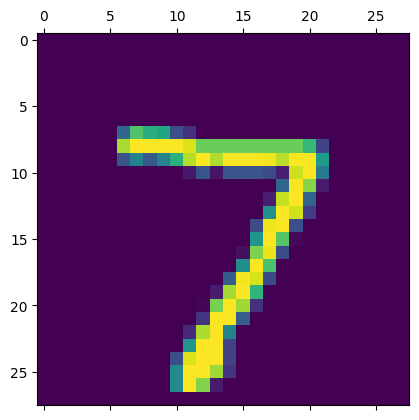

In [59]:
plt.matshow(x_test[0])

In [61]:
y_predicted = model.predict(x_test_flattend)
y_predicted[0]

313/313 [==============================] - 0s 932us/step


array([1.6152410e-02, 2.9963471e-07, 3.4995466e-02, 9.2912340e-01,
       1.8823670e-03, 1.0409087e-01, 9.9295050e-07, 9.9977082e-01,
       7.2810970e-02, 6.3558930e-01], dtype=float32)

In above output you can see 10 values which are the similarity scores, lets check the maximum one

In [63]:
np.argmax(y_predicted[0])

7

Lets build confusion matrix, here we can directly use tensorflow to do that

In [68]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
#the maximum argument is the label for all the results
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    8,  938,   13,    8,    5,   13,   10,   28,    5],
       [   2,    0,   26,  914,    1,   26,    2,   10,   16,   13],
       [   1,    2,    3,    1,  906,    0,   14,    4,    7,   44],
       [   9,    3,    4,   19,   11,  787,   17,    6,   27,    9],
       [   7,    3,    6,    1,    7,    9,  922,    2,    1,    0],
       [   1,    6,   24,    4,    8,    1,    0,  937,    2,   45],
       [   6,   14,    9,   18,    9,   29,   10,   10,  849,   20],
       [   9,    7,    1,    8,   21,    6,    0,   11,    5,  941]],
      dtype=int32)>

lets visualize the cm better

Text(95.72222222222221, 0.5, 'Truth')

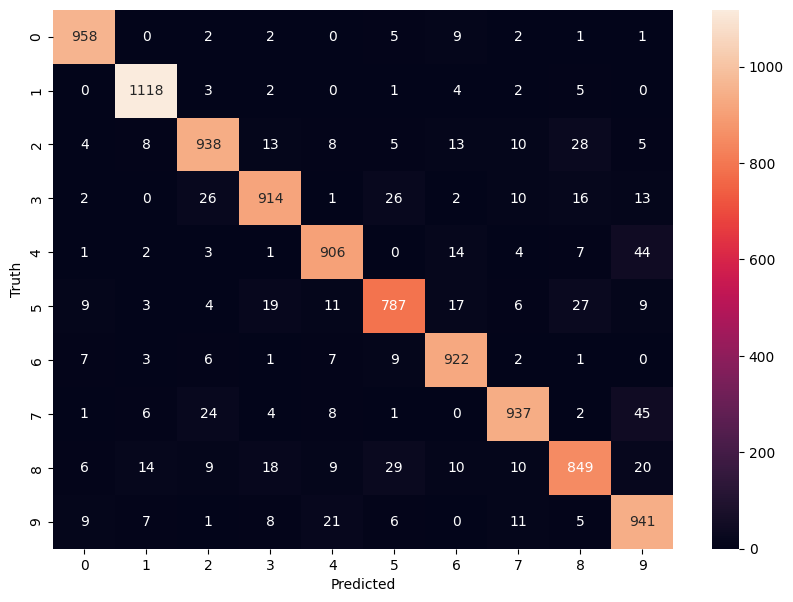

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now lets copy the above model and add a hidden layer in it

In [72]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]) 

* The second layer already knows how many inputs from previous layer are present so no need to mention
* The output of first layer will decide the size of secod layer, it is decided based on trial and error
* Lets use relu activation function for input
* The processing time increased from 29 s to 39.9 s after and accuracy increased from 92.7% to 97.5% after adding a hidden layer

In [73]:
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flattend, y_train, epochs=5)

Epoch 1/5


2023-10-09 14:32:19.296526: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 12s 5ms/step - loss: 0.2766 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9838


In [75]:
model.evaluate(x_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9758


[0.07823862880468369, 0.9757999777793884]

lets check the confusion matrix again

In [78]:

y_predicted = model.predict(x_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
#the maximum argument is the label for all the results
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 1s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    0,    0,    2,    1,    3,    0],
       [   0, 1117,    5,    1,    0,    1,    2,    1,    8,    0],
       [   3,    0, 1012,    2,    2,    0,    1,    4,    8,    0],
       [   0,    0,    7,  980,    1,   11,    0,    4,    3,    4],
       [   1,    0,    3,    1,  957,    0,    5,    3,    2,   10],
       [   2,    0,    0,    8,    1,  875,    1,    1,    2,    2],
       [   6,    2,    0,    1,    2,   14,  933,    0,    0,    0],
       [   0,    3,   14,    6,    2,    1,    0,  995,    4,    3],
       [   3,    0,    7,    8,    2,    4,    2,    4,  941,    3],
       [   3,    2,    1,    4,    8,    4,    2,    7,    2,  976]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

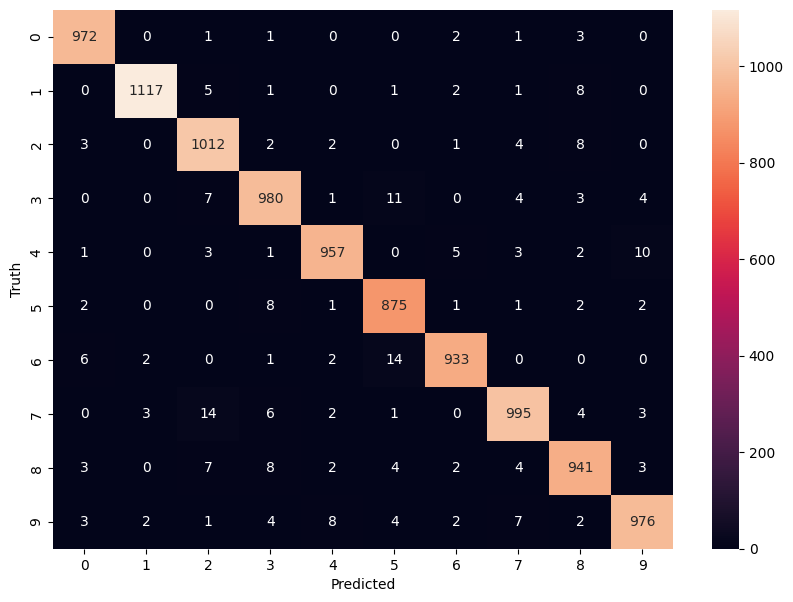

In [79]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Lets use Kertas' flattern function instead of doing it ourselves

In [82]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]) 
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2772 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1259 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0877 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0281 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 

In [83]:
model.evaluate(x_test, y_test)
# after increasing epochs the accuracy converges towards 100 but still when tried on test data does not increase much

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9763


[0.08169324696063995, 0.9763000011444092]